# Solutions for the Lane-Emden with n=0

In [1]:
from shutil import which

import matplotlib.pyplot as plt
import numpy as np
import seaborn
from sympy import (
    Derivative,
    Function,
    Symbol,
    dsolve,
    lambdify,
    simplify,
    solve,
    symbols,
)
from sympy import Eq as Equation

rem = 12

seaborn.set(context="notebook", style="darkgrid")

plt.ioff()

plt.rc("lines", linewidth=1)
plt.rc("font", family="serif")
plt.rc("font", size=rem)
plt.rc("axes", titlepad=1.500 * rem)
plt.rc("axes", titlesize=1.728 * rem)
plt.rc("axes", labelsize=1.200 * rem)
plt.rc("legend", fontsize=1.000 * rem)
plt.rc("xtick", labelsize=0.833 * rem)
plt.rc("ytick", labelsize=0.833 * rem)

if which("latex"):
    plt.rc("text", usetex=True)

material_palette = {
    -1: "#212121",
    0: "#F44336",
    1: "#E91E63",
    2: "#9C27B0",
    3: "#673AB7",
    4: "#3F51B5",
    5: "#2196F3",
    6: "#03A9F4",
    7: "#00BCD4",
    8: "#009688",
    9: "#4CAF50",
    10: "#8BC34A",
    11: "#CDDC39",
    12: "#FFEB3B",
    13: "#FFC107",
    14: "#FF9800",
    15: "#FF5722",
}

In [2]:
%matplotlib inline

In [4]:
n = Symbol("n")
xi = Symbol("xi")
theta = Function("theta")

In [5]:
lhs = simplify((1 / xi**2) * Derivative((xi**2) * Derivative(theta(xi), xi), xi).doit())
lhs

Derivative(theta(xi), (xi, 2)) + 2*Derivative(theta(xi), xi)/xi

In [6]:
rhs = -(theta(xi) ** n)
rhs

-theta(xi)**n

In [7]:
lane_endem_eq = Equation(lhs, rhs)
lane_endem_eq

Eq(Derivative(theta(xi), (xi, 2)) + 2*Derivative(theta(xi), xi)/xi, -theta(xi)**n)

In [8]:
lane_endem_eq_1 = lane_endem_eq.subs(n, 1)
lane_endem_eq_1

Eq(Derivative(theta(xi), (xi, 2)) + 2*Derivative(theta(xi), xi)/xi, -theta(xi))

In [9]:
solution = dsolve(lane_endem_eq_1, theta(xi))
solution

Eq(theta(xi), (C1*besselj(1/2, xi) + C2*bessely(1/2, xi))/sqrt(xi))

In [10]:
constants = solve(
    [
        simplify(xi * solution.rhs).subs(xi, 0),
        Derivative(simplify(xi * solution.rhs), xi).doit().subs(xi, 0) - 1,
    ],
    symbols("C1 C2"),
)
constants

{C1: sqrt(2)*sqrt(pi)/2, C2: 0}

In [11]:
solution = solution.subs(constants)
solution

Eq(theta(xi), sqrt(2)*sqrt(pi)*besselj(1/2, xi)/(2*sqrt(xi)))

In [12]:
solution = solution.simplify()
solution

Eq(theta(xi), sin(xi)/xi)

In [13]:
theta_zeros = solve(solution.rhs, xi)
theta_zeros

[pi]

In [14]:
num_theta_f = lambdify(xi, solution.rhs, "numpy")

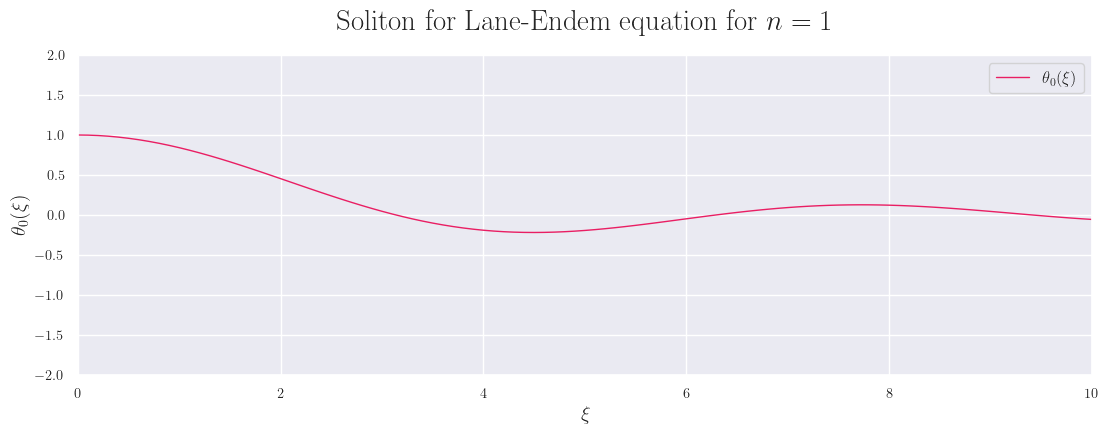

In [15]:
n_xi = np.linspace(0, 10, 101)
n_theta = np.ones(n_xi.shape)
n_theta[1:] = num_theta_f(n_xi[1:])

fig = plt.figure(figsize=(11.25, 4.5), frameon=False)
axs = fig.add_subplot(1, 1, 1)

axs.plot(n_xi, n_theta, color=material_palette[1], label=r"$\theta_0(\xi)$")
axs.legend()
axs.set_title(r"Soliton for Lane-Endem equation for $n=1$")
axs.set_xlim([0, 10])
axs.set_xlabel(r"$\xi$")
axs.set_ylim([-2, 2])
axs.set_ylabel(r"$\theta_0(\xi)$")
plt.tight_layout()
plt.show()